In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols)
df.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [3]:
from pprint import pprint
df['pre_clean_len'] = [len(t) for t in df.text]
data_dict = {
    'sentiment':{
        'type': df.sentiment.dtype,
        'description': 'sentiment class - 0:negative, 1:positive',
    },
    'text':{
        'type': df.text.dtype,
        'description': 'tweet text',
    },
    'pre_clean_len':{
        'type': df.pre_clean_len.dtype,
        'description': 'Length of the tweet before cleaning',
    },
    'dataset_shape': df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


In [59]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def text_cleaner(text):
    # removes html encoding
    temp = BeautifulSoup(text, 'lxml').get_text()
    temp.replace("'", "") # avoids removing contractions
    # lowercase
    temp = temp.lower()
    # removes mentions
    temp = re.sub(r'@[A-Za-z0-9_]+', '', temp)
    # removes urls
    temp = re.sub(r'https?://\S+', '', temp)
    temp = re.sub(r'www.\S+', '', temp)
    # removes all non letters
    temp = re.sub(r'[&,.]', ' ', temp)
    temp = re.sub(r'[^a-z\s]+', '', temp)
    # tokenizes and removes stopwords
    # temp = re.sub('\s+', ' ', temp)
    temp = temp.split()
    temp = [w for w in temp if w not in stopwords]
    cleaned = " ".join(word for word in temp)
    cleaned = temp.strip()
    return cleaned

clean_tweets = []
for i in range(len(df)):
    if ((i+1) % 10000 == 0): print("%d tweets have been cleaned" % (i+1))
    clean_t = text_cleaner(df.text[i])
    if clean_t: clean_tweets.append(clean_t)

clean_tweets_with_stopwords = []
# for i in range(len(df)):
#     if ((i+1) % 10000 == 0): print("%d tweets have been cleaned" % (i+1))
#     clean_t = text_cleaner(df.text[i])
#     if clean_t: clean_tweets_with_stopwords.append(clean_t)

c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


10000 tweets have been cleaned
20000 tweets have been cleaned
30000 tweets have been cleaned
40000 tweets have been cleaned
50000 tweets have been cleaned
60000 tweets have been cleaned
70000 tweets have been cleaned
80000 tweets have been cleaned
90000 tweets have been cleaned
100000 tweets have been cleaned
110000 tweets have been cleaned
120000 tweets have been cleaned
130000 tweets have been cleaned
140000 tweets have been cleaned
150000 tweets have been cleaned
160000 tweets have been cleaned
170000 tweets have been cleaned
180000 tweets have been cleaned
190000 tweets have been cleaned
200000 tweets have been cleaned
210000 tweets have been cleaned
220000 tweets have been cleaned
230000 tweets have been cleaned
240000 tweets have been cleaned
250000 tweets have been cleaned
260000 tweets have been cleaned
270000 tweets have been cleaned
280000 tweets have been cleaned
290000 tweets have been cleaned
300000 tweets have been cleaned
310000 tweets have been cleaned
320000 tweets hav

In [45]:
# note just setting 'target' to df.sentiment actually mislabels some of them oops
clean_df = pd.DataFrame(clean_tweets, columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweets.csv', encoding='utf-8')

In [61]:
clean_with_stopwords_df = pd.DataFrame(clean_tweets_with_stopwords, columns=['text'])
clean_with_stopwords_df['target'] = df.sentiment
clean_with_stopwords_df.to_csv('clean_tweets_with_stopwords.csv', encoding='utf-8')

LogisticRegression() 

Validation result for 10000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 78.36%
model is 28.28% more accurate than null accuracy
train and test time: 94.72s
--------------------------------------------------------------------------------
Validation result for 20000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.00%
model is 28.92% more accurate than null accuracy
train and test time: 101.20s
--------------------------------------------------------------------------------
Validation result for 30000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.11%
model is 29.04% more accurate than null accuracy
train and test time: 92.93s
--------------------------------------------------------------------------------
Validation result for 40000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.45%
model is 29.38% more accurate than null accuracy
train and test time: 92.96s
--------------------------------------------------------------------------------
Validation result for 50000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.48%
model is 29.41% more accurate than null accuracy
train and test time: 96.71s
--------------------------------------------------------------------------------
Validation result for 60000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.47%
model is 29.40% more accurate than null accuracy
train and test time: 92.20s
--------------------------------------------------------------------------------
Validation result for 70000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.55%
model is 29.47% more accurate than null accuracy
train and test time: 95.14s
--------------------------------------------------------------------------------
Validation result for 80000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.63%
model is 29.56% more accurate than null accuracy
train and test time: 97.39s
--------------------------------------------------------------------------------
Validation result for 90000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.54%
model is 29.46% more accurate than null accuracy
train and test time: 93.61s
--------------------------------------------------------------------------------
Validation result for 100000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.57%
model is 29.49% more accurate than null accuracy
train and test time: 96.12s
--------------------------------------------------------------------------------


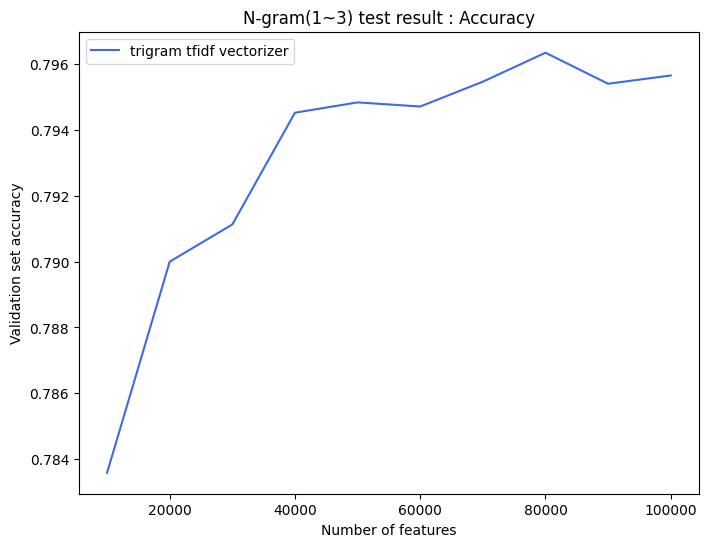

In [63]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

my_df = pd.read_csv('clean_tweets.csv', index_col=0)
x = my_df.text
y = my_df.target
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
    # if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
    #     null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    # else:
    #     null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier, "\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# feature_result_ugt = nfeature_accuracy_checker()
# feature_result_bgt = nfeature_accuracy_checker(ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(ngram_range=(1, 3))

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
# nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
# nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
# plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
# plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
# plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
# plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
# plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [81]:
import tweepy
consumer_key = 'BAEsDIvgMfqf9x5qMVknxB3de'
consumer_secret = 'vQcOk34ul1oLyn6mVkhShrHf7IrX4OFRchQ6pP13iVRuot6P1d'
access_token = '1611033532922531840-DNon2MS8KBhJe2lVKEroUOE3Hrk3Az'
access_token_secret = 'ibO36GOT09sG7lCNh5882mdqPd5nLXE0RaudzHR3kpzpr'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAANEmlAEAAAAAtmGiP9j20R7VUpE1pLQqGqjHfAs%3DpZRR007AssGyalwzrXBXmXuvRKRnaolQUgRXP43NhbGMx7fmtm'

client = tweepy.Client(bearer_token)
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)
# api = tweepy.API(auth)

search_word = 'tesla' 
date_since = '2023-01-01'

# tweets = tweepy.search_recent_tweets(api.search_tweets, q = search_word, lang ='en', since = date_since).items(100)
tweets = client.search_recent_tweets(query=search_word)
# tweet_details = [[tweet.geo,tweet.text,tweet.user.screen_name,tweet.user.location] for tweet in tweets]
# tweet_details = [tweet.text for tweet in tweets]
for tweet in tweets.data:
    print(tweet.text)

@nathaliejacoby1 apple, microsoft, tesla
@elonmusk the tesla investors begging u to stfu: 💀
RT @WholeMarsBlog: Tesla will be bigger than Apple, Elon’s impact has been more broad than Steve Jobs, and transitioning the energy infrast…
setroi actualidad : Más de 16.000 millones en un año: los bajistas tocan el cielo con Tesla. setroi noticias: El mayor beneficiario podría ser Bill Gates, por quien Elon Musk nunca ha ocultado su desprecio Leer
@WholeMarsBlog @elonmusk FSD requires AGI level perfection because lives are at stake ie it ain’t happening anytime soon.

Tesla Bot is the real game changer. It will scale with real use cases within 3 years. The vision stack is already good enough.
@jasonrmcintyre Damn your tesla take! Dogs r amazing
I just entered @AutoTrader_UK’s monthly️ #ElectricCarGiveaway &amp; you can too! This month’s prize is a Tesla Model Y worth over £51k! It’s free to enter &amp; you have until 31st January. All information (including Ts&amp;Cs) can be found here: https:

API KEY = BAEsDIvgMfqf9x5qMVknxB3de
API KEY SECRET = vQcOk34ul1oLyn6mVkhShrHf7IrX4OFRchQ6pP13iVRuot6P1d
vQcOk34ul1oLyn6mVkhShrHf7IrX4OFRchQ6pP13iVRuot6P1d
BEARER TOKEN = AAAAAAAAAAAAAAAAAAAAANEmlAEAAAAAtmGiP9j20R7VUpE1pLQqGqjHfAs%3DpZRR007AssGyalwzrXBXmXuvRKRnaolQUgRXP43NhbGMx7fmtm
AAAAAAAAAAAAAAAAAAAAANEmlAEAAAAAtmGiP9j20R7VUpE1pLQqGqjHfAs%3DpZRR007AssGyalwzrXBXmXuvRKRnaolQUgRXP43NhbGMx7fmtm
ACCESS TOKEN = 1611033532922531840-DNon2MS8KBhJe2lVKEroUOE3Hrk3Az
ACCESS TOKEN SECRET = ibO36GOT09sG7lCNh5882mdqPd5nLXE0RaudzHR3kpzpr

In [96]:
# def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
#     null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
#     # if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
#     #     null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
#     # else:
#     #     null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
#     t0 = time()
#     sentiment_fit = pipeline.fit(x_train, y_train)
#     y_pred = sentiment_fit.predict(x_test)
#     train_test_time = time() - t0
#     accuracy = accuracy_score(y_test, y_pred)
#     print("null accuracy: {0:.2f}%".format(null_accuracy*100))
#     print("accuracy score: {0:.2f}%".format(accuracy*100))
#     if accuracy > null_accuracy:
#         print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
#     elif accuracy == null_accuracy:
#         print("model has the same accuracy with the null accuracy")
#     else:
#         print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
#     print("train and test time: {0:.2f}s".format(train_test_time))
#     print("-"*80)
#     return accuracy, train_test_time

# def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
#     result = []
#     print(classifier, "\n")
#     for n in n_features:
#         vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
#         checker_pipeline = Pipeline([
#             ('vectorizer', vectorizer),
#             ('classifier', classifier)
#         ])
#         print("Validation result for {} features".format(n))
#         nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
#         result.append((n,nfeature_accuracy,tt_time))
#     return result

def sentiment_analyzer_maker(vectorizer, num_features, ngram_range, classifier, train_df):
    vectorizer.set_params(max_features=num_features, ngram_range=ngram_range)
    sentiment_analyzer = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    sentiment_analyzer = sentiment_analyzer.fit(train_df.text, train_df.target)
    return sentiment_analyzer

lr = LogisticRegression(max_iter = 10)
searched_tweets = client.search_recent_tweets(query=search_word, max_results=100)
tweets_to_analyze = []
for tweet in searched_tweets.data:
    tweets_to_analyze.append(text_cleaner(tweet.text))
sentiment_analyzer = sentiment_analyzer_maker(tvec, 80000, (1,3), lr, my_df)

c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
def sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze):
    predicted_sentiments = sentiment_analyzer.predict(tweets_to_analyze)
    print(predicted_sentiments)
    print(sum(predicted_sentiments)/len(predicted_sentiments))
    print((sum(predicted_sentiments)/len(predicted_sentiments))/4)

sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze)

[4 4 4 4 4 0 4 4 0 4 0 4 4 4 0 0 4 4 0 4 0 4 0 4 0 0 4 4 4 4 4 4 4 4 0 0 4
 0 4 4 0 4 0 4 0 4 4 4 4 4 0 0 0 4 0 4 4 4 4 4 4 4 0 4 4 0 4 4 4 4 4 4 4 4
 4 4 0 0 4 0 4 4 4 4 4 0 0 0 0 0 4 4 4 4 0 0 4 4 4 4]
2.72
0.68
